In [1]:
import numpy as np
from hmm import GaussianHMM
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from kalman_filter import Kalman1D
from sklearn import cluster
import pandas as pd

# 1 导入数据

In [11]:
stock_name = 'AAPL'
data = pd.read_csv('StockData/{}.csv'.format(stock_name))

误差为：1.071110
相对误差率为：0.92%


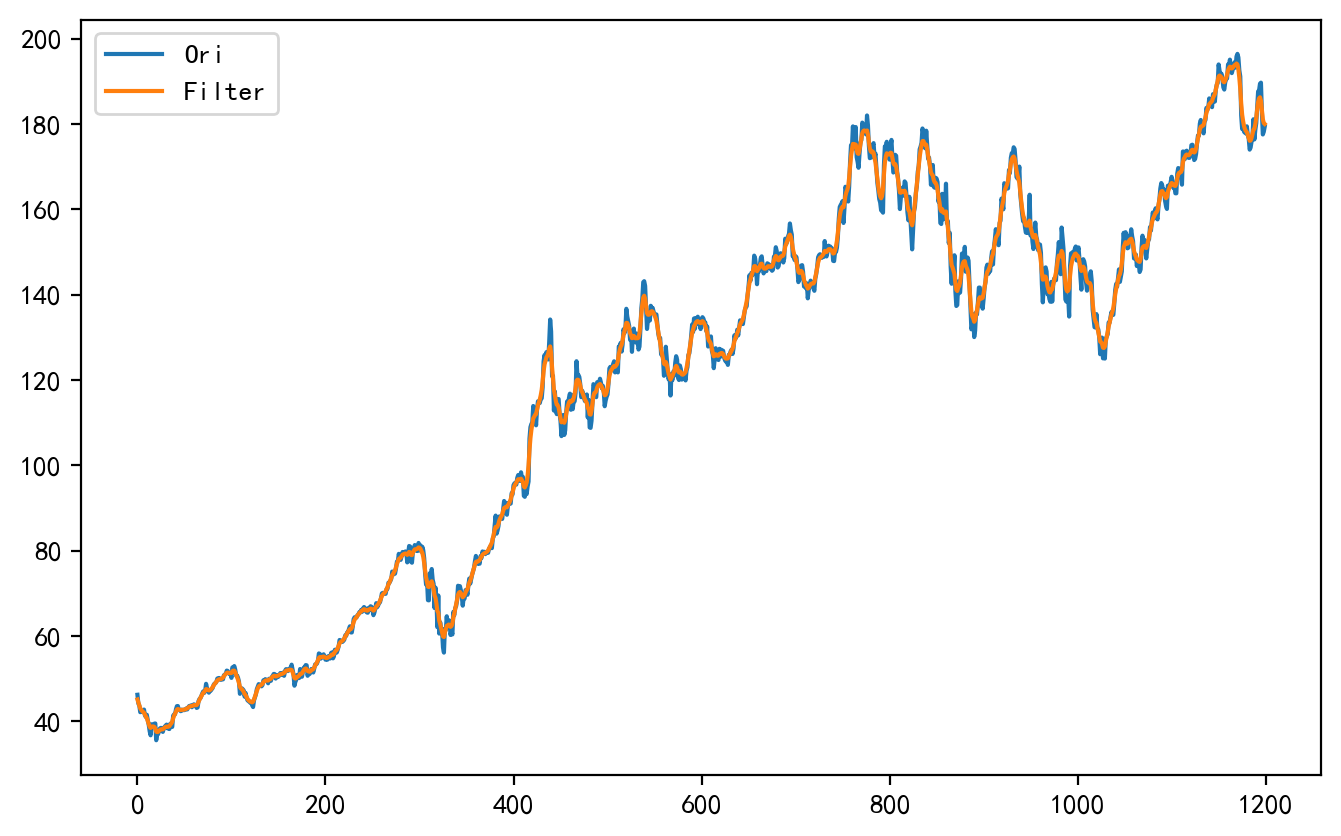

In [12]:

Origin_data=data["Close"]
data_size=1200
stock_data=data["Close"][:data_size]
x = data.index[:data_size]
filter_data=Kalman1D(stock_data,0.3)
error=np.sum(np.abs(stock_data-filter_data.flatten()))/len(stock_data)
error_rate=np.sum(np.abs(stock_data-filter_data.flatten())/np.abs(stock_data))/len(stock_data)
print("误差为：{:.6f}".format(error))
print("相对误差率为：{:.2f}%".format(error_rate*100))

plt.figure(figsize=(8,5),dpi=200)
plt.plot(x,list(stock_data),label="Ori")
plt.plot(x,filter_data,label="Filter")
plt.legend()
plt.show()


In [13]:
X=np.array(stock_data).reshape(-1,1)

# 2 训练模型

In [21]:
"""训练高斯HMM模型"""

hiden_state_num= 32    #隐藏状态个数
X_dim=1               #输入数据维数
epoch=40              #迭代次数
if_kmeans=True        #是否使用Kmeans均值初始化

model = GaussianHMM(hiden_state_num,X_dim,epoch,if_kmeans) 

model.train(X)

  0%|          | 0/40 [00:00<?, ?it/s]

聚类初始化成功！
开始训练


100%|██████████| 40/40 [00:41<00:00,  1.04s/it]

训练完成,耗时：41.44sec


AIC: 5468.696101719057
BIC: 5631.578560463892


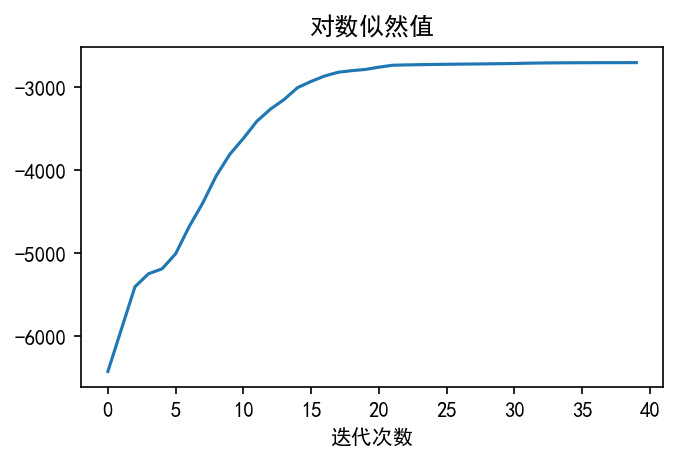

In [22]:
plt.rcParams["figure.dpi"]=150
plt.figure(figsize=(5,3))
plt.plot(model.L)
plt.xlabel("迭代次数")
plt.title("对数似然值")

AIC=2*hiden_state_num-2*model.L[-1]
BIC=hiden_state_num*np.log(len(X))-2*model.L[-1]
print("AIC:",AIC)
print("BIC:",BIC)

# 3 拟合

平均误差为： 1.1150779702074127
相对误差率为：1.23%


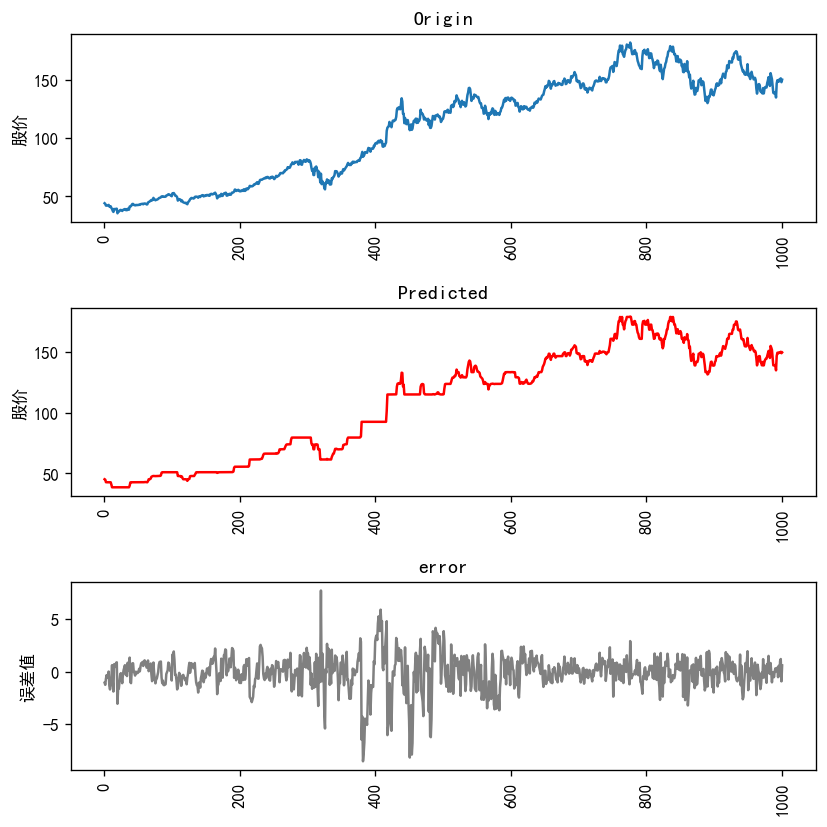

In [23]:
pred_num=1000
now_x=np.array(stock_data).reshape(-1,1)[1:pred_num+1]
pred=model.predict(now_x,pred_num)
error=now_x-pred.reshape(-1,1)    #误差
error_rate=np.sum(np.abs(error)/now_x)/len(error)
print("平均误差为：",np.sum(np.abs(error))/len(error))
print("相对误差率为：{:.2f}%".format(error_rate*100))

plt.rcParams["figure.dpi"]=120
plt.figure(figsize=(7,7))
plt.subplot(3,1,1)
plt.plot(list(data.index)[1:pred_num+1],list(now_x),label="Origin")
plt.xticks(rotation=90)
plt.ylabel("股价")
plt.title("Origin")

plt.subplot(3,1,2)
plt.plot(list(data.index)[1:pred_num+1],pred,"r",label="Predicted")
plt.xticks(rotation=90)
plt.ylabel("股价")
plt.title("Predicted")

plt.subplot(3,1,3)
plt.plot(list(data.index)[1:pred_num+1],error,"gray",label="error")
plt.ylabel("误差值")
plt.xticks(rotation=90)
plt.title("error")
plt.tight_layout()
plt.show()

平均误差为： 1.1150779702074127
相对误差率为：1.23%


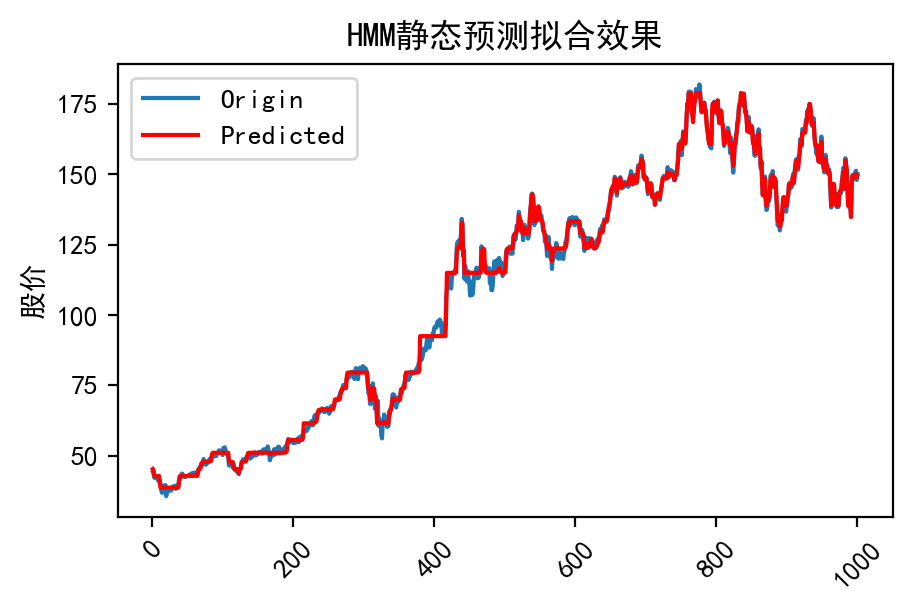

In [27]:
pred_num=1000
now_x=np.array(stock_data).reshape(-1,1)[1:pred_num+1]
pred=model.predict(now_x,pred_num)
error=now_x-pred.reshape(-1,1)    #误差
error_rate=np.sum(np.abs(error)/now_x)/len(error)
print("平均误差为：",np.sum(np.abs(error))/len(error))
print("相对误差率为：{:.2f}%".format(error_rate*100))


plt.figure(figsize=(5,3),dpi=200)
# plt.subplot(2,1,1)
plt.plot(list(data.index)[1:pred_num+1],list(now_x),label="Origin")
plt.plot(list(data.index)[1:pred_num+1],pred,"r",label="Predicted")
plt.xticks(rotation=45)
plt.title("HMM静态预测拟合效果")
plt.ylabel("股价")
plt.legend()
plt.show()


# 4 预测

平均误差为： 2.4582116534164697
相对误差率为：1.70%


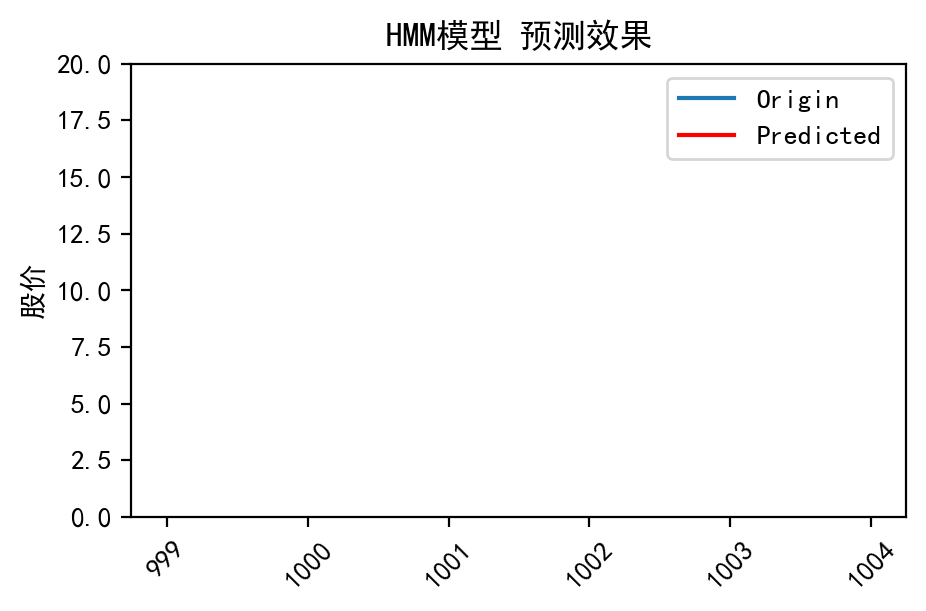

In [28]:
pred_num=1005
observe_start=1000
now_x=np.array(Origin_data).reshape(-1,1)[1:pred_num+1]
pred=model.predict(now_x,pred_num)
now_x=now_x[observe_start-1:pred_num-1]
pred=pred[observe_start:pred_num]

error=now_x-pred.reshape(-1,1)    #误差
error_rate=np.sum(np.abs(error)/now_x)/len(error)
print("平均误差为：",np.sum(np.abs(error))/len(error))
print("相对误差率为：{:.2f}%".format(error_rate*100))


plt.figure(figsize=(5,3),dpi=200)
# plt.subplot(2,1,1)
plt.plot(list(data.index)[observe_start-1:pred_num-1],list(now_x),label="Origin")
plt.plot(list(data.index)[observe_start:pred_num],pred,"r",label="Predicted")
plt.xticks(rotation=45)
plt.title("HMM模型 预测效果")
plt.ylabel("股价")
plt.ylim(0,20)
plt.legend()
plt.show()


# 5 迭代预测

Text(0.5, 1.0, 'AAPL股票变化情况')

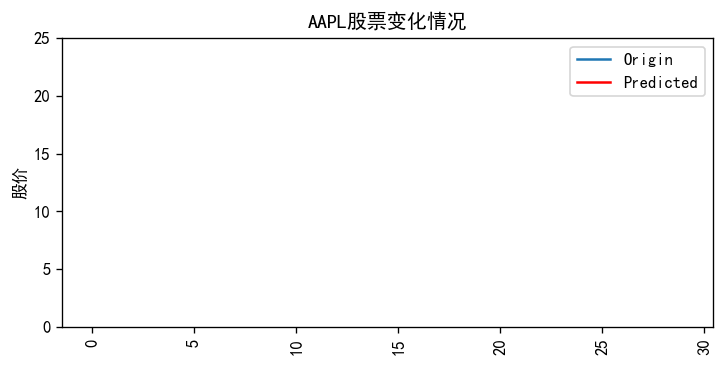

In [19]:
end=1230
b=model.predict_more(X,end)
#error=X[1:]-b[:-1].reshape(-1,1)    #误差
#print("平均误差为：",np.sum(np.abs(error))/len(error))

plt.rcParams["figure.dpi"]=120
plt.figure(figsize=(7,7))
plt.subplot(2,1,1)
plt.plot(list(data["Close"][data_size:end]),label="Origin")
plt.plot(b[data_size:end],"r",label="Predicted")
plt.xticks(rotation=90)
plt.ylabel("股价")
plt.ylim(0,25)
plt.legend()
plt.title("AAPL股票变化情况")